In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
data = pd.read_csv('swiggy.csv')
data

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
0,211,Koramangala,Bangalore,Tandoor Hut,300.0,4.4,100,"Biryani,Chinese,North Indian,South Indian",5Th Block,59
1,221,Koramangala,Bangalore,Tunday Kababi,300.0,4.1,100,"Mughlai,Lucknowi",5Th Block,56
2,246,Jogupalya,Bangalore,Kim Lee,650.0,4.4,100,Chinese,Double Road,50
3,248,Indiranagar,Bangalore,New Punjabi Hotel,250.0,3.9,500,"North Indian,Punjabi,Tandoor,Chinese",80 Feet Road,57
4,249,Indiranagar,Bangalore,Nh8,350.0,4.0,50,"Rajasthani,Gujarati,North Indian,Snacks,Desser...",80 Feet Road,63
...,...,...,...,...,...,...,...,...,...,...
8675,464626,Panjarapole Cross Road,Ahmedabad,Malt Pizza,500.0,2.9,80,Pizzas,Navrangpura,40
8676,465835,Rohini,Delhi,Jay Mata Ji Home Kitchen,200.0,2.9,80,South Indian,Rohini,28
8677,465872,Rohini,Delhi,Chinese Kitchen King,150.0,2.9,80,"Chinese,Snacks,Tandoor",Rohini,58
8678,465990,Rohini,Delhi,Shree Ram Paratha Wala,150.0,2.9,80,"North Indian,Indian,Snacks",Rohini,28


In [3]:
data.columns

Index(['ID', 'Area', 'City', 'Restaurant', 'Price', 'Avg ratings',
       'Total ratings', 'Food type', 'Address', 'Delivery time'],
      dtype='object')

In [4]:
#checking if there is any duplicate data 
data['ID'].duplicated().any()

False

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8680 entries, 0 to 8679
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             8680 non-null   int64  
 1   Area           8680 non-null   object 
 2   City           8680 non-null   object 
 3   Restaurant     8680 non-null   object 
 4   Price          8680 non-null   float64
 5   Avg ratings    8680 non-null   float64
 6   Total ratings  8680 non-null   int64  
 7   Food type      8680 non-null   object 
 8   Address        8680 non-null   object 
 9   Delivery time  8680 non-null   int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 678.3+ KB


In [6]:
data.describe()

,ID,Price,Avg ratings,Total ratings,Delivery time
count,8680.000000,8680.000000,8680.000000,8680.000000,8680.000000
mean,244812.071429,348.444470,3.655104,156.634793,53.967051
std,158671.617188,230.940074,0.647629,391.448014,14.292335
min,211.000000,0.000000,2.000000,20.000000,20.000000
25%,72664.000000,200.000000,2.900000,50.000000,44.000000
50%,283442.000000,300.000000,3.900000,80.000000,53.000000
75%,393425.250000,400.000000,4.200000,100.000000,64.000000
max,466928.000000,2500.000000,5.000000,10000.000000,109.000000


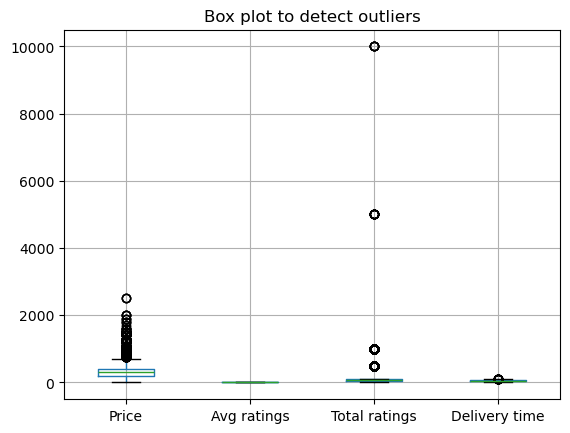

So the price data and Total rating data has outliers


In [30]:
numerical_columns = ['Price', 'Avg ratings','Total ratings', 'Delivery time']
numerical_columns=data[numerical_columns]
numerical_columns.boxplot()
plt.title('Box plot to detect outliers')
plt.show()

print('So the price data and Total rating data has outliers')


In [7]:
# Checking missing values 
data.isnull().sum()

ID               0
Area             0
City             0
Restaurant       0
Price            0
Avg ratings      0
Total ratings    0
Food type        0
Address          0
Delivery time    0
dtype: int64

In [8]:
data.City.value_counts()

City
Kolkata      1346
Mumbai       1277
Chennai      1106
Pune         1090
Hyderabad    1075
Bangalore     946
Ahmedabad     717
Delhi         611
Surat         512
Name: count, dtype: int64

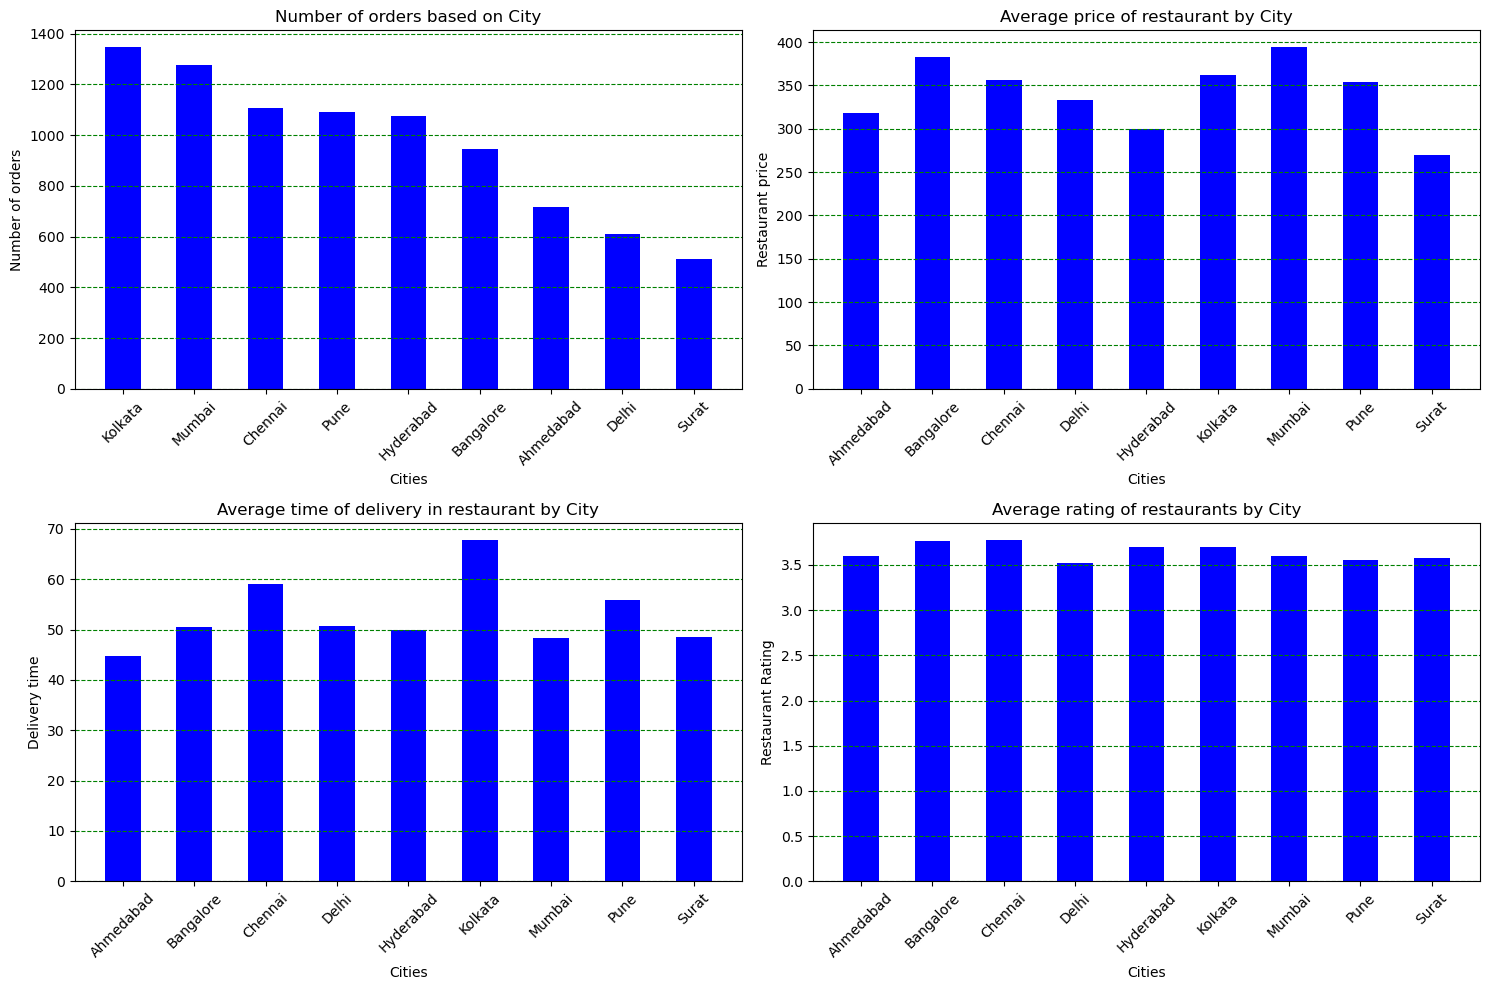

Number of order vs City
From the graph we can cleary see kolkata city has highest number of orders where as Surat city has lowest number of orders placed

Avgerage price vs City
We can infer from the graph that Mumbai city has highest Restaurant price where as Surat city has lowest restaurant price

Delivery time vs City
In terms of delivery time, Kolkata city has more delivery time and Ahmedabad city has least delivery time

Average rating vs City
Almost all cities received on an average rating around 3.5


In [9]:
fig,axes = plt.subplots(2,2, figsize= (15,10))


axes[0,0].bar(data.City.value_counts().index,data.City.value_counts().values,color ='blue', width=0.5)
axes[0,0].set_title('Number of orders based on City')
axes[0,0].tick_params(axis='x',rotation = 45)
axes[0,0].set_ylabel('Number of orders')
axes[0,0].set_xlabel('Cities')
axes[0,0].grid(axis='y',color='g', linestyle = '--')


avg_price = data.groupby('City')['Price'].mean()

axes[0,1].bar(avg_price.index,avg_price.values,color ='blue', width=0.5)
axes[0,1].set_title('Average price of restaurant by City')
axes[0,1].tick_params(axis='x',rotation = 45)
axes[0,1].set_ylabel('Restaurant price')
axes[0,1].set_xlabel('Cities')
axes[0,1].grid(axis='y',color='g', linestyle = '--')


avg_time = data.groupby('City')['Delivery time'].mean()

axes[1,0].bar(avg_time.index,avg_time.values,color ='blue', width=0.5)
axes[1,0].set_title('Average time of delivery in restaurant by City')
axes[1,0].tick_params(axis='x',rotation = 45)
axes[1,0].set_ylabel('Delivery time')
axes[1,0].set_xlabel('Cities')
axes[1,0].grid(axis='y',color='g', linestyle = '--')


avg_rating = data.groupby('City')['Avg ratings'].mean()

axes[1,1].bar(avg_rating.index,avg_rating.values,color ='blue', width=0.5)
axes[1,1].set_title('Average rating of restaurants by City')
axes[1,1].tick_params(axis='x',rotation = 45)
axes[1,1].set_ylabel('Restaurant Rating')
axes[1,1].set_xlabel('Cities')

axes[1,1].grid(axis='y',color='g', linestyle = '--')



plt.tight_layout()
plt.show()

print('Number of order vs City')
print('From the graph we can cleary see kolkata city has highest number of orders where as Surat city has lowest number of orders placed')
print()
print('Avgerage price vs City')
print('We can infer from the graph that Mumbai city has highest Restaurant price where as Surat city has lowest restaurant price')
print()
print('Delivery time vs City')
print('In terms of delivery time, Kolkata city has more delivery time and Ahmedabad city has least delivery time')
print()
print('Average rating vs City')
print('Almost all cities received on an average rating around 3.5')




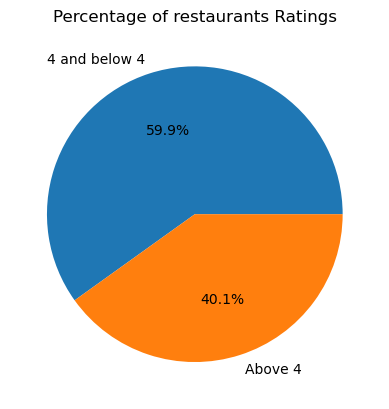

From the above the pie chart we can cleary see, there almost 60 percent of swiggy restaurants has rating 4 and below 4 where as 
 40 percet restaurent has ratings more than 4.


In [25]:
data['category'] = data['Avg ratings'].apply(lambda x: 'Above 4' if x > 4 else '4 and below 4')
percentage = data['category'].value_counts(normalize=True)*100

plt.Figure(figsize=(6,6))
plt.pie(percentage.values, labels=percentage.index,autopct='%1.1f%%')
plt.title('Percentage of restaurants Ratings')
plt.show()

print('From the above the pie chart we can cleary see, there almost 60 percent of swiggy restaurants has rating 4 and below 4 where as \n 40 percet restaurent has ratings more than 4.')

In [10]:
import statistics

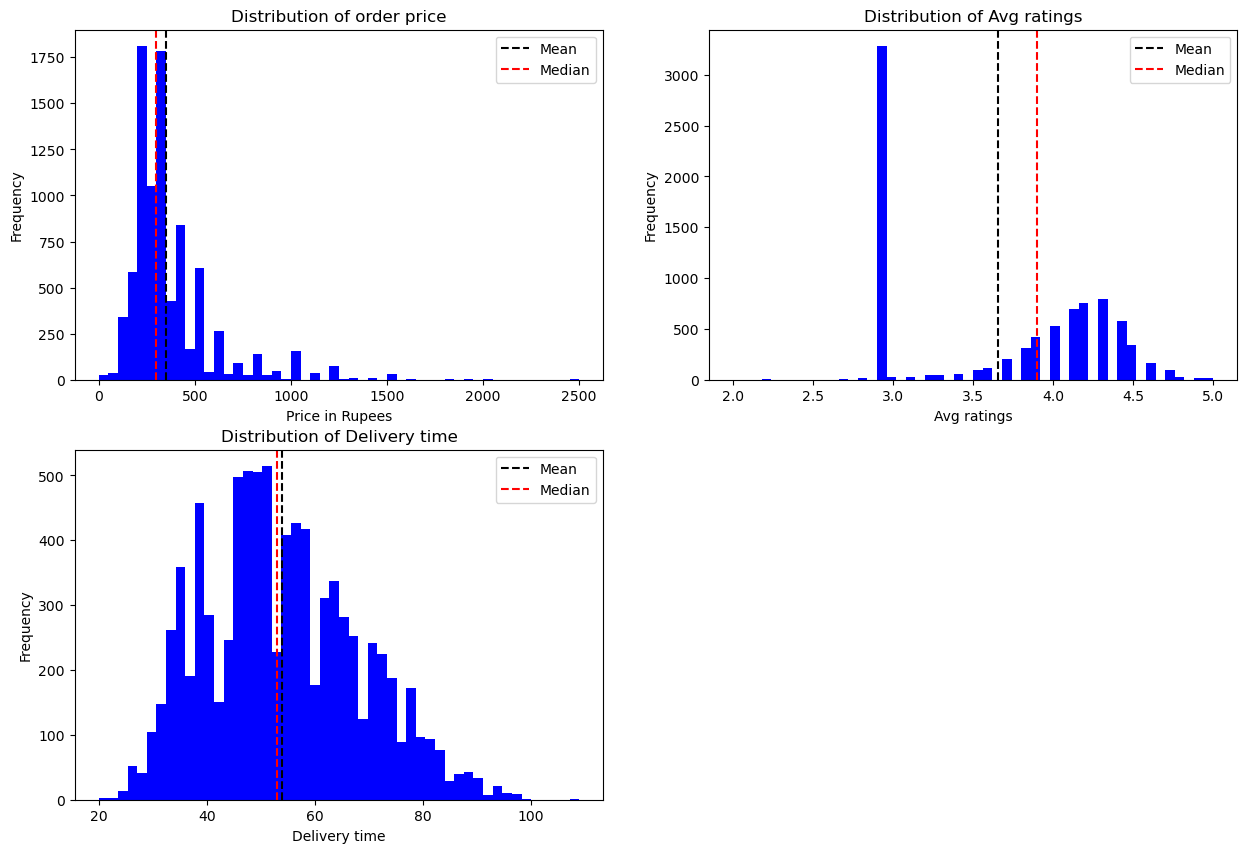

For price
Mean and Median of price are 348.4444700460829 and 300.0 respectively
From the above values we can say that this distribution of price is Right Skewed
For Avg rating
Mean and Median of Avg ratings are 3.655103686635944 and 3.9 respectively
From the above values we can say that this distribution of Avg ratingsis Left Skewed
For Delivery time
Mean and Median of Delivery time are 53.96705069124424 and 53.0 respectively
From the above values we can say that this distribution of Delivery time is approximately normal distrubution


In [11]:

fig,axes = plt.subplots(2,2, figsize= (15,10))


#distribution of price in swiggy restaurents 
axes[0,0].hist(data['Price'],bins=50, color = 'blue')
axes[0,0].axvline(np.mean(data['Price']),linestyle='--',color = 'black', label='Mean')
axes[0,0].axvline(np.median(data['Price']),linestyle='--',color = 'red',label='Median')
axes[0,0].set_xlabel('Price in Rupees')
axes[0,0].set_ylabel('Frequency')
axes[0,0].set_title('Distribution of order price')
axes[0,0].legend(loc='upper right')



#distribution of Avg ratings in swiggy restaurents 
axes[0,1].hist(data['Avg ratings'],bins=50, color = 'blue')
axes[0,1].axvline(np.mean(data['Avg ratings']),linestyle='--',color = 'black',label='Mean')
axes[0,1].axvline(np.median(data['Avg ratings']),linestyle='--',color = 'red',label='Median')
axes[0,1].set_xlabel('Avg ratings')
axes[0,1].set_ylabel('Frequency')
axes[0,1].set_title('Distribution of Avg ratings')
axes[0,1].legend(loc='upper right')


axes[1,0].hist(data['Delivery time'],bins=50, color = 'blue')
axes[1,0].axvline(np.mean(data['Delivery time']),linestyle='--',color = 'black',label='Mean')
axes[1,0].axvline(np.median(data['Delivery time']),linestyle='--',color = 'red',label='Median')
axes[1,0].set_xlabel('Delivery time')
axes[1,0].set_ylabel('Frequency')
axes[1,0].set_title('Distribution of Delivery time')
axes[1,0].legend(loc='upper right')

axes[1,1].axis('off')
plt.tight_layout

plt.show()

print('For price')
print('Mean and Median of price are',np.mean(data['Price']),'and',np.median(data['Price']),'respectively')
print('From the above values we can say that this distribution of price is Right Skewed')

print('For Avg rating')
print('Mean and Median of Avg ratings are',np.mean(data['Avg ratings']),'and',np.median(data['Avg ratings']),'respectively')
print('From the above values we can say that this distribution of Avg ratingsis Left Skewed')


print('For Delivery time')
print('Mean and Median of Delivery time are',np.mean(data['Delivery time']),'and',np.median(data['Delivery time']),'respectively')
print('From the above values we can say that this distribution of Delivery time is approximately normal distrubution')


In [12]:
correlation=data[['Price', 'Avg ratings','Delivery time']].corr()
correlation

,Price,Avg ratings,Delivery time
Price,1.000000,0.113630,0.076009
Avg ratings,0.113630,1.000000,-0.146987
Delivery time,0.076009,-0.146987,1.000000


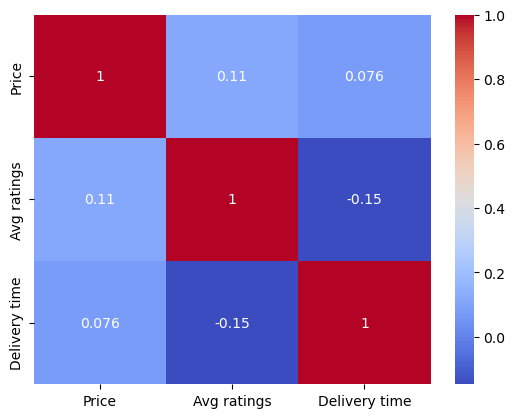

In [13]:
sns.heatmap(correlation,cmap='coolwarm',annot=True)
plt.show()

From the above heatmap, we can clearly see, there is no any correlation between delivery time, Avg. rating and Price of restaurants 